# MAKE IT WORK FOR ALL THE MOLECULE

In [9]:
#! /usr/bin/env python
# Author : Manas Mahale <manas.mahale@bcp.edu.in>


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

In [2]:
desc = pd.read_csv("../Data/processed/descriptors.csv").T[1:].T

In [3]:
col = desc.columns.to_list()

In [4]:
# with open("../Data/processed/min_main1.cif") as f:
#     data = [i.split() for i in f.readlines()[10:]]
    
# a = pd.DataFrame(data)
# a.columns = ["ID", "ATOM", "X", "Y", "Z", "tmp"]
# atom = a["ID"].to_numpy()
# a = a.drop(['ATOM','ID','tmp'], axis = 1)
# a = a.to_numpy('float64')

# aa = []
# for i in a:
#     Dist = []    
#     for j in a:
#         Dist.append(np.linalg.norm(i - j))
#     aa.append(Dist)
# aa = np.array(aa, "float64")

In [39]:
names = os.listdir("../Data/processed/")
names.remove("descriptors.csv")
names.remove(".DS_Store")

dist_matrix = np.array([],dtype='float64')
for name in names:
    with open(f"../Data/processed/{name}") as f:
        data = [i.split() for i in f.readlines()[10:]]

    a = pd.DataFrame(data)
    a.columns = ["ID", "ATOM", "X", "Y", "Z", "tmp"]
    atom = a["ID"].to_numpy()
    a = a.drop(['ATOM','ID','tmp'], axis = 1)
    a = a.to_numpy('float64')

    aa = []
    for i in a:
        Dist = []    
        for j in a:
            Dist.append(np.linalg.norm(i - j))
        aa.append(Dist)
    aa = np.array(aa, "float64")
    np.append(dist_matrix, aa)

In [40]:
dist_matrix.shape

(0,)

In [5]:
aaaa = []
for i in col:
    aaa = []
    for j in desc[i].to_list():
        np.fill_diagonal(aa, j)
        aaa.append(aa)
    aaa = np.array(aaa)
    aaaa.append(aaa)
aaaa = np.array(aaaa)

In [6]:
aaaa.shape

(1085, 29, 83, 83)

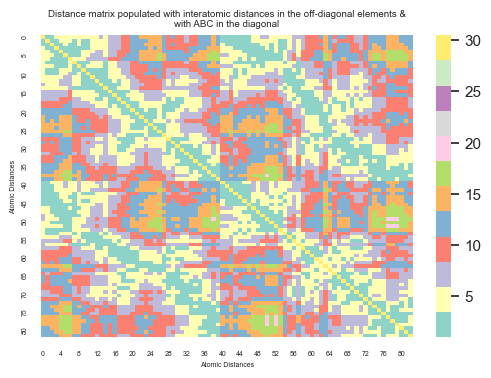

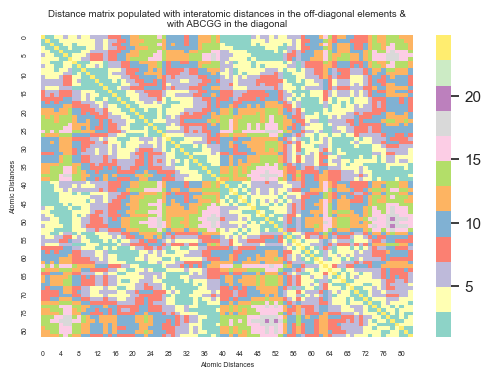

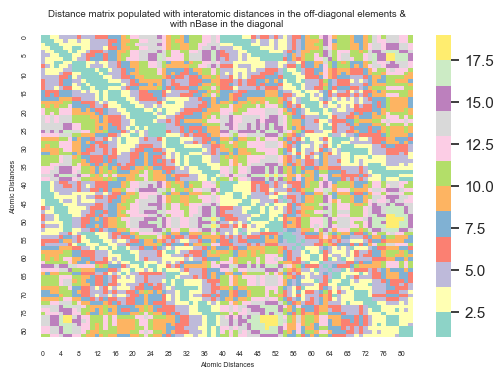

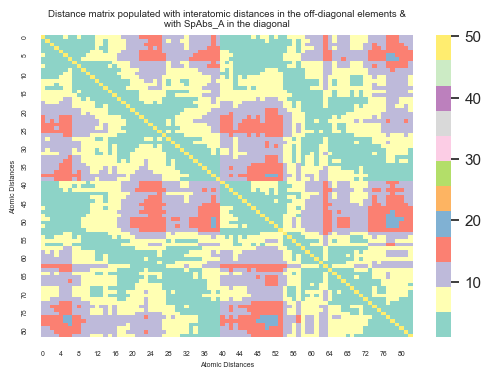

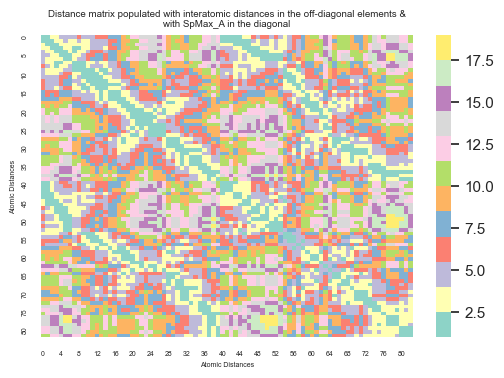

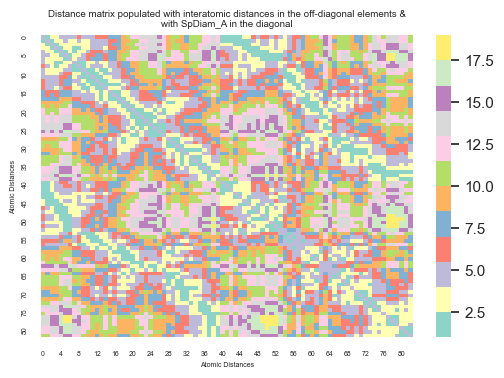

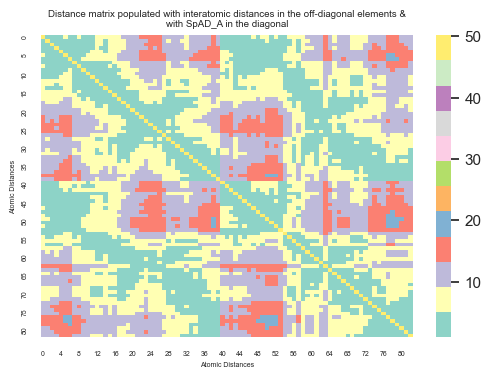

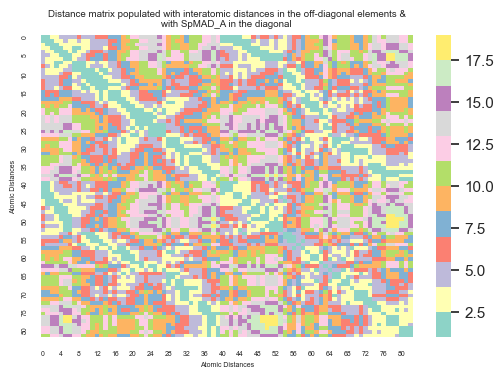

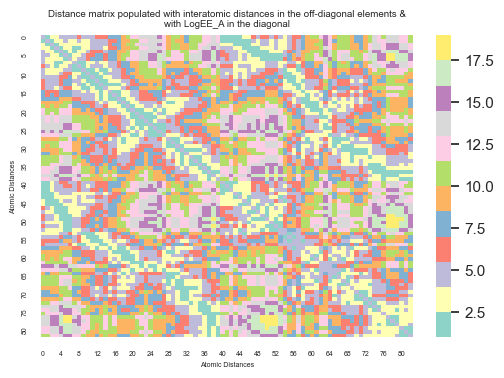

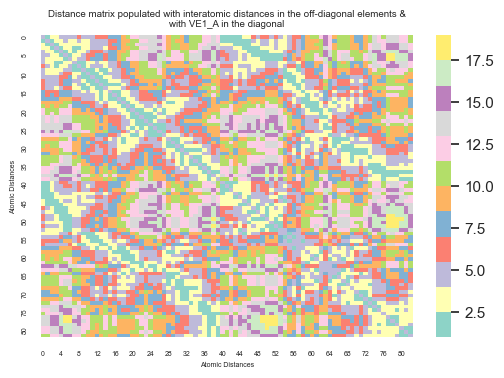

In [7]:
for i in range(10):
    plt.figure(dpi=100)
    b = sns.heatmap(aaaa[i][0], cmap="Set3")
    b.axes.set_title(f"Distance matrix populated with interatomic distances in the off-diagonal elements &\nwith {col[i]} in the diagonal",fontsize=7)
    b.set_xlabel("Atomic Distances",fontsize=5)
    b.set_ylabel("Atomic Distances",fontsize=5)
    b.tick_params(labelsize=5)

 ### $n$(1085) properties x $i$(29) items of each property x $m$ atoms x $m$ atoms x $k$(29) molecules
 
 ### Shape should be : (1085,29,29,m,m)

# NOT NOW

In [8]:
# Eigen stuff
w, v = np.linalg.eig(aa)
  
# printing eigen values
print(f"Eigen values:\n {np.sort(w)[::-1]}\n\n")
  
# printing eigen vectors
print(f"Eigenvectors:\n {v}")
w.shape

Eigen values:
 [ 6.76887252e+02  8.76464150e+00  8.76247189e+00  8.75807072e+00
  8.74943059e+00  8.74759881e+00  8.74512491e+00  8.73754021e+00
  8.71530751e+00  8.71096436e+00  8.70917132e+00  8.69802125e+00
  8.69184562e+00  8.68686471e+00  8.67174459e+00  8.66838476e+00
  8.66069928e+00  8.65257603e+00  8.63236459e+00  8.61902458e+00
  8.59669020e+00  8.58722321e+00  8.57205905e+00  8.56165748e+00
  8.53341379e+00  8.51026693e+00  8.45491644e+00  8.44766849e+00
  8.42074435e+00  8.38757999e+00  8.35162290e+00  8.33781690e+00
  8.30553914e+00  8.27755793e+00  8.23799053e+00  8.22350292e+00
  8.21096966e+00  8.18841066e+00  8.17157708e+00  8.15910682e+00
  8.13632634e+00  8.12400706e+00  8.11950918e+00  8.07572084e+00
  8.04090313e+00  8.01257172e+00  7.96719986e+00  7.95865174e+00
  7.89042430e+00  7.86699439e+00  7.80952281e+00  7.77328763e+00
  7.72121798e+00  7.67732469e+00  7.63680935e+00  7.57727790e+00
  7.47199565e+00  7.36808247e+00  7.25283805e+00  7.15193685e+00
  6.956035

(83,)